## Qualitative Evaluation Example

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import torch
import dense_correspondence_manipulation.utils.utils as utils
utils.add_dense_correspondence_to_python_path()

import dense_correspondence
from dense_correspondence.evaluation.evaluation import *
import dense_correspondence.correspondence_tools.correspondence_plotter as correspondence_plotter
from dense_correspondence.dataset.dense_correspondence_dataset_masked import ImageType

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
!ls /home/tomasz/data/pdc/trained_models/

caterpillar_standard_params_3	      my_models
hats_consistent_M_background_0.500_3  shoes_consistent_M_background_0.500_3


Using SpartanDataset:
   - in train mode
   - number of scenes 16
   - total images:     5849
squashing with providd stats {'max': 1.0, 'min': -1.0}
squashing with providd stats {'max': 1.0, 'min': -1.0}
squashing with providd stats {'max': 1.0, 'min': -1.0}
squashing with providd stats {'max': 1.0, 'min': -1.0}
squashing with providd stats {'max': 1.0, 'min': -1.0}
squashing with providd stats {'max': 1.0, 'min': -1.0}
squashing with providd stats {'max': 1.0, 'min': -1.0}
squashing with providd stats {'max': 1.0, 'min': -1.0}
squashing with providd stats {'max': 1.0, 'min': -1.0}
squashing with providd stats {'max': 1.0, 'min': -1.0}
squashing with providd stats {'max': 1.0, 'min': -1.0}
squashing with providd stats {'max': 1.0, 'min': -1.0}
squashing with providd stats {'max': 1.0, 'min': -1.0}
squashing with providd stats {'max': 1.0, 'min': -1.0}
squashing with providd stats {'max': 1.0, 'min': -1.0}
squashing with providd stats {'max': 1.0, 'min': -1.0}
squashing with providd sta

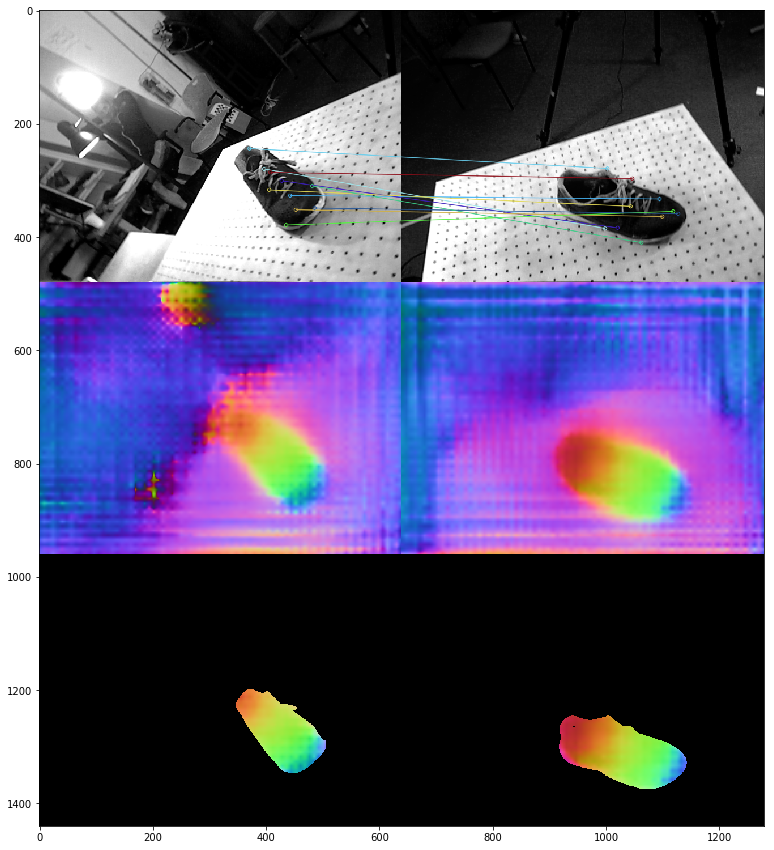

Image pair (803, 1248)


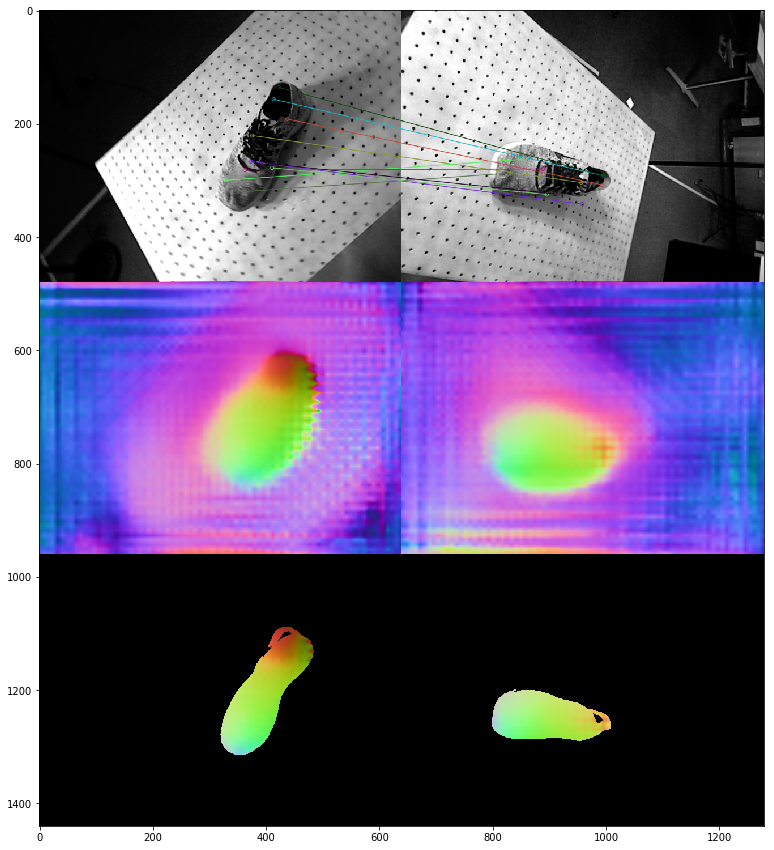

Image pair (2793, 3550)


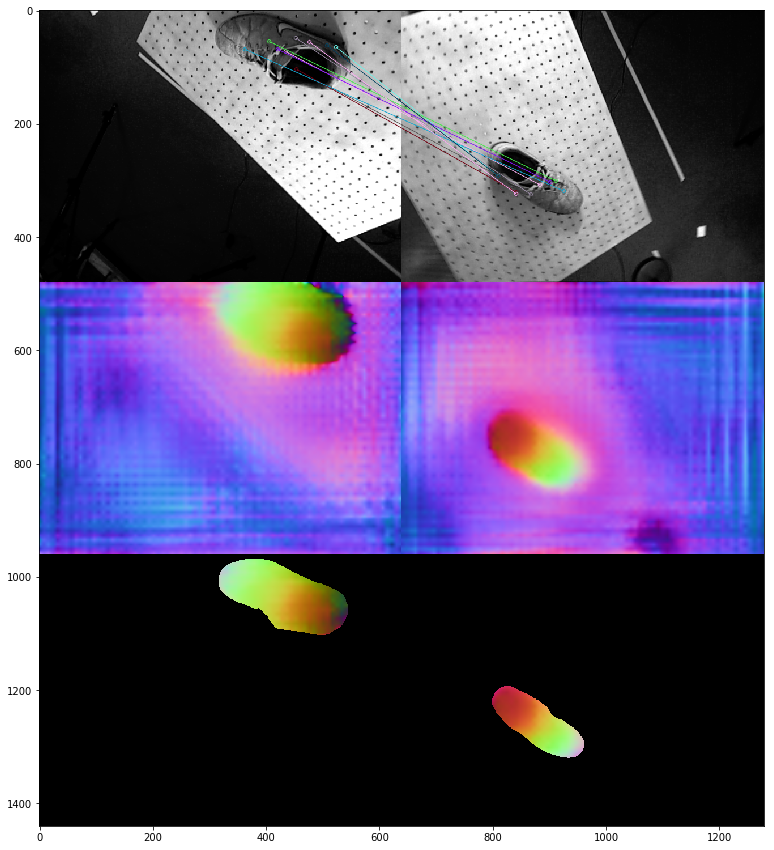

Image pair (1464, 2079)


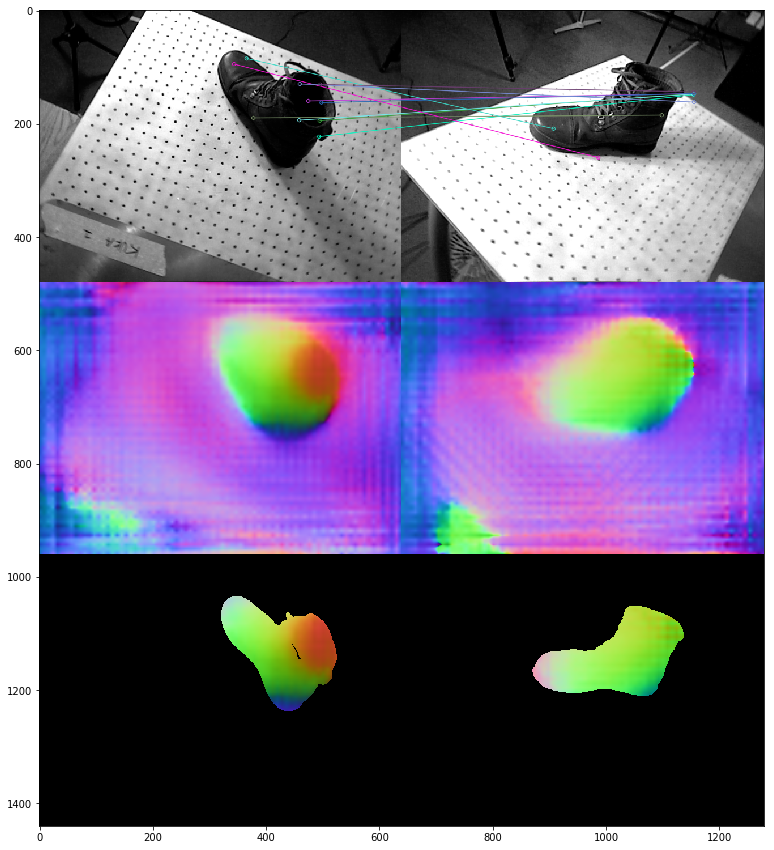

Image pair (2322, 2680)


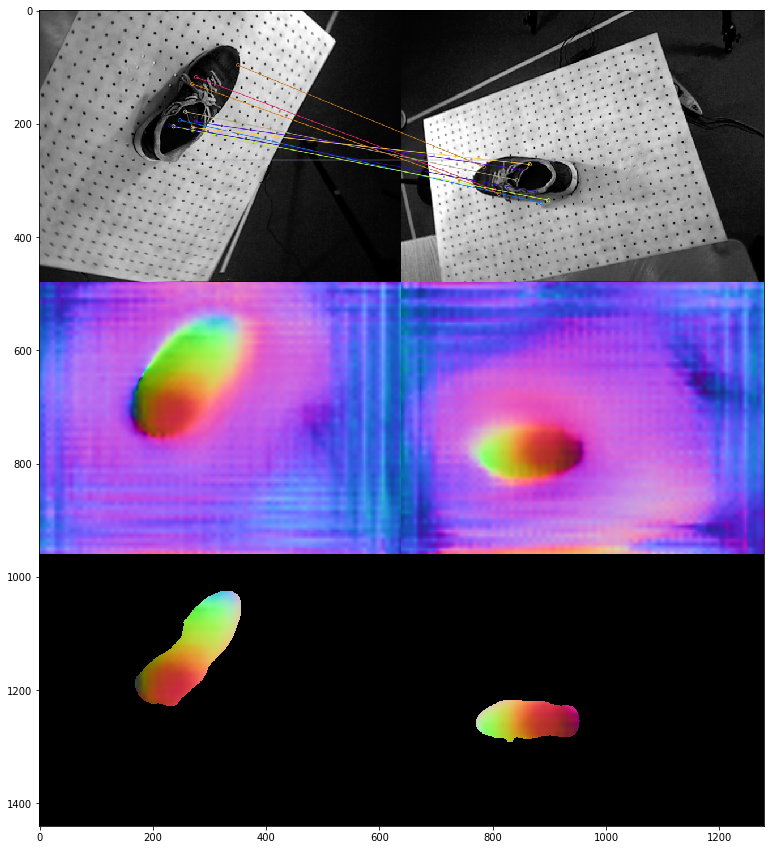



-----------Test Data Evaluation----------------
Image pair (629, 1083)


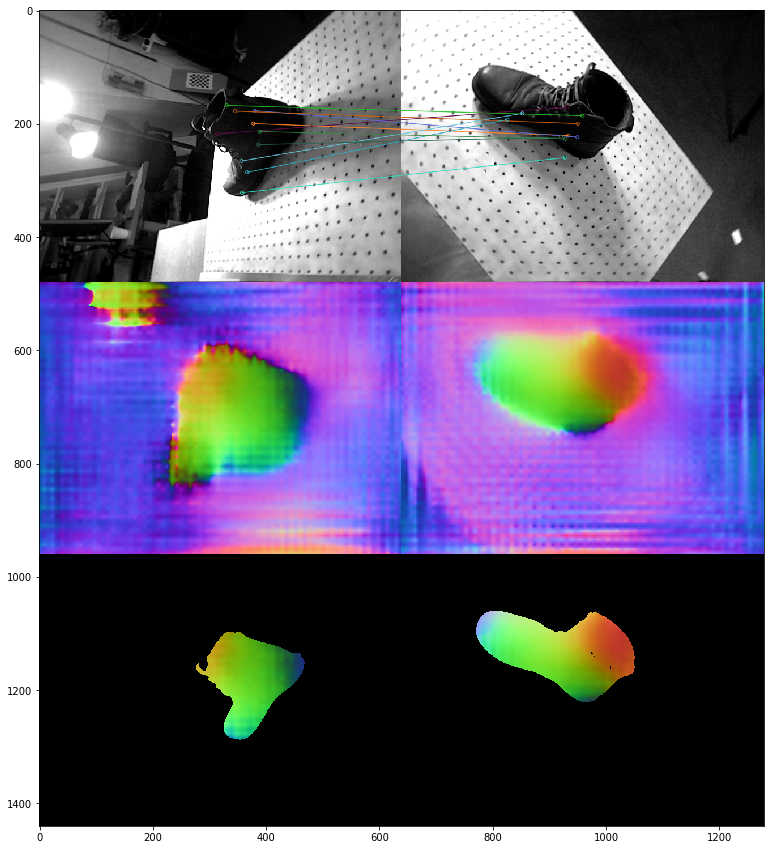

Image pair (806, 2078)


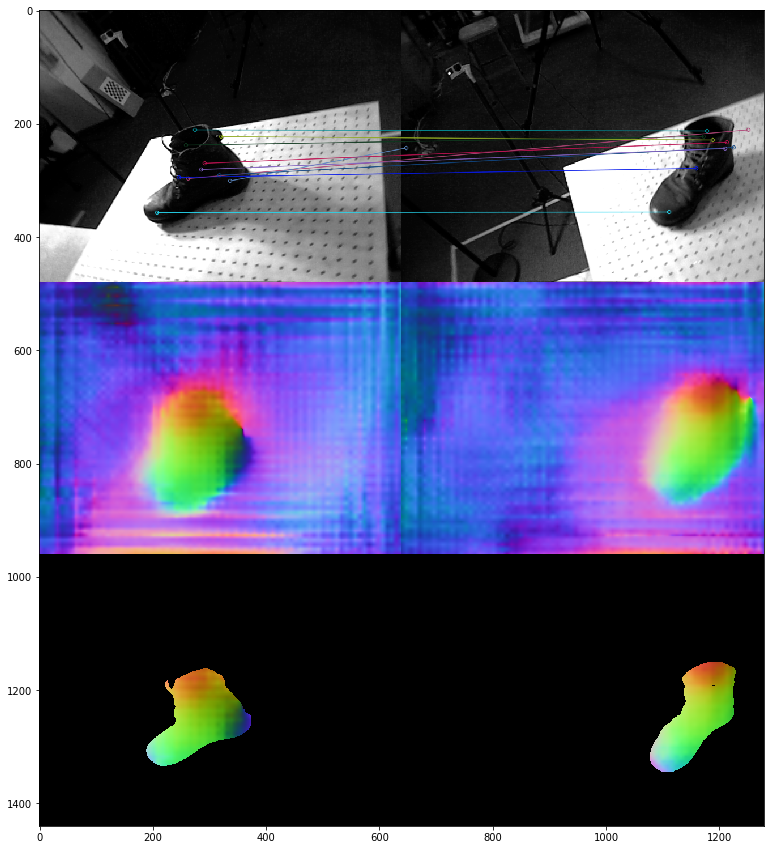

Image pair (1738, 0)


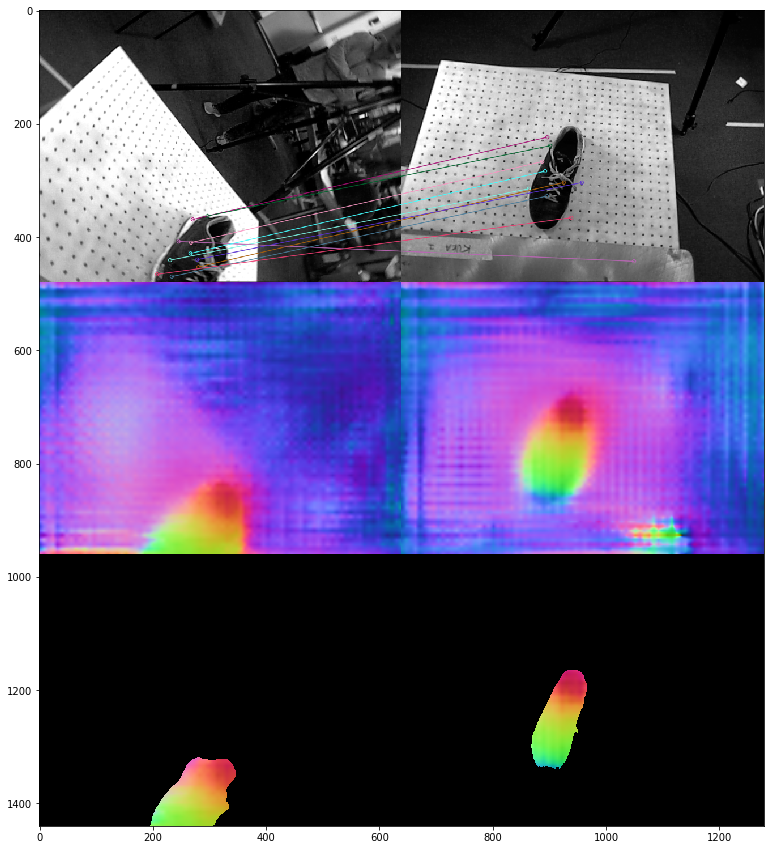

Image pair (720, 2309)


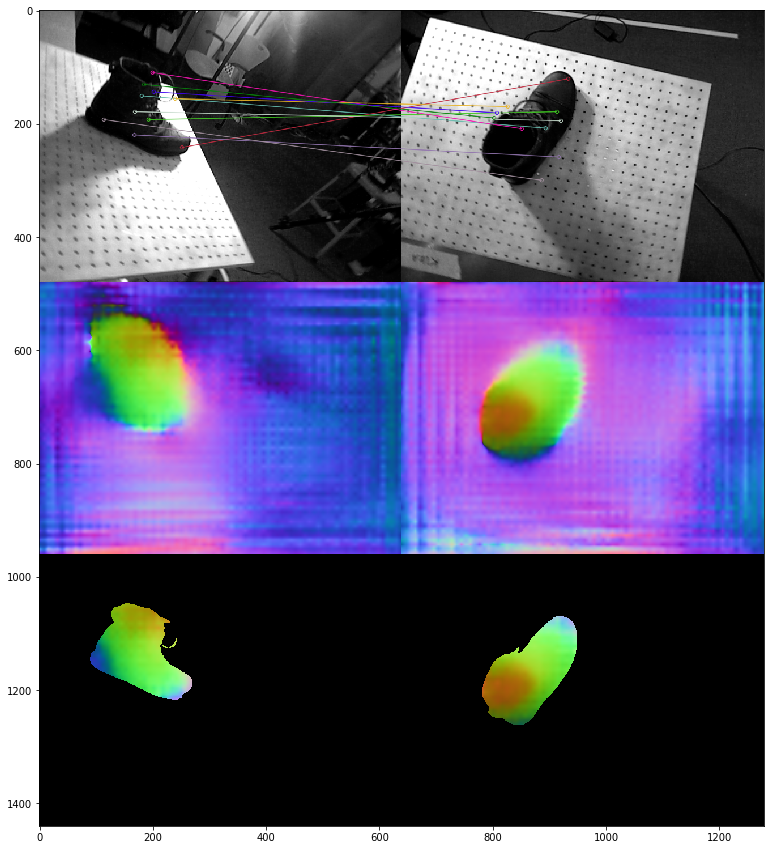

Image pair (398, 581)


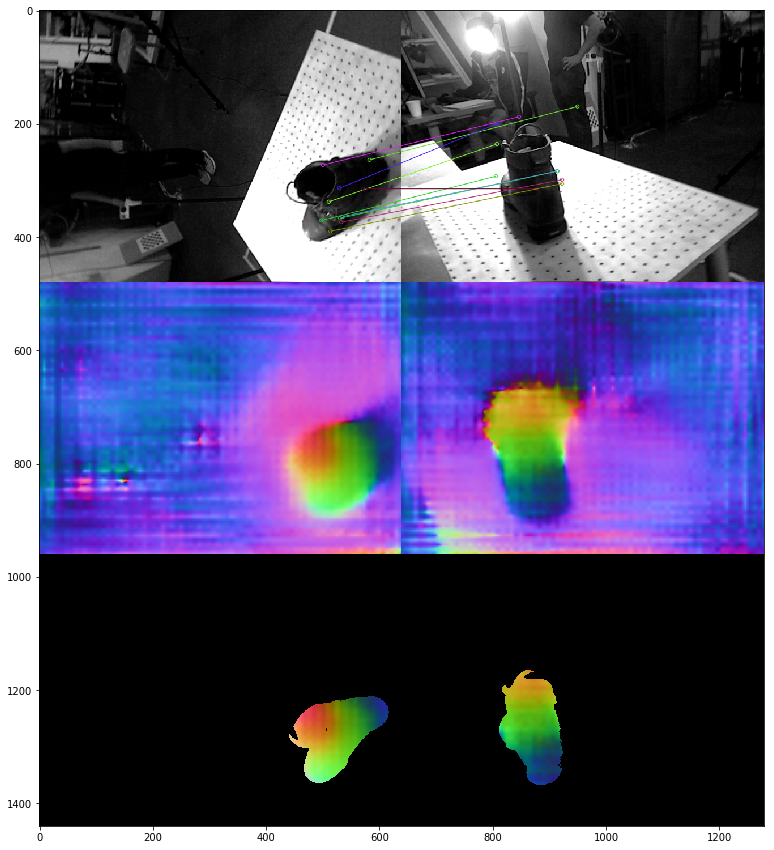

In [92]:
src_dir = utils.getDenseCorrespondenceSourceDir()
config_filename = os.path.join(src_dir, 'config/dense_correspondence/evaluation/evaluation.yaml')
config = utils.getDictFromYamlFilename(config_filename)

model_path = 'tomasz/data/pdc/trained_models/shoes_consistent_M_background_0.500_3/003501.pth'
config['networks']['caterpillar_3']['path_to_network_params'] = model_path

# utils.set_cuda_visible_devices([0])
dce = DenseCorrespondenceEvaluation(config)
DCE = DenseCorrespondenceEvaluation

network_name = "caterpillar_3"
dcn = dce.load_network_from_config(network_name)
dataset = dcn.load_training_dataset()
DenseCorrespondenceEvaluation.evaluate_network_qualitative(dcn, dataset=dataset, randomize=True, output_is_normalized=True)

In [37]:
dcn.descriptor_image_stats

{'entire_image': {'max': [1.0766164064407349,
   0.9684668779373169,
   2.2307307720184326],
  'mean': [-0.10457669943571091, -0.22262030839920044, 0.5541790127754211],
  'min': [-2.684469699859619, -1.5931787490844727, -0.821259617805481]},
 'mask_image': {'max': [0.7305974364280701,
   0.9684668779373169,
   1.0392730236053467],
  'mean': [0.16775642335414886, 0.2063317894935608, -0.2564740777015686],
  'min': [-0.39287760853767395, -0.6135923862457275, -0.821259617805481]}}

In [43]:
scene_names, img_pairs = DenseCorrespondenceEvaluation.get_random_scenes_and_image_pairs(dataset)

In [44]:
scene_name = scene_names[0]
img_pair = img_pairs[0]
img_a_idx, img_b_idx = img_pair[0], img_pair[1]

In [45]:
rgb_a, _, mask_a, _ = dataset.get_rgbd_mask_pose(scene_name, img_a_idx)
rgb_b, _, mask_b, _ = dataset.get_rgbd_mask_pose(scene_name, img_b_idx)

In [46]:
mask_a = np.asarray(mask_a)
mask_b = np.asarray(mask_b)

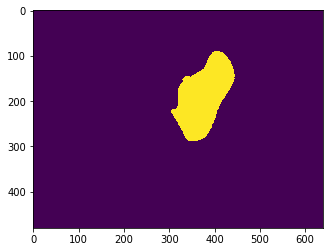

In [47]:
plt.imshow(mask_a)

In [48]:
res = DenseCorrespondenceEvaluation.single_same_scene_image_pair_qualitative_analysis(
        dcn, dataset, scene_name, img_pair[0], img_pair[1], output_is_normalized=False)

squashing with providd stats {'max': [0.7305974364280701, 0.9684668779373169, 1.0392730236053467], 'mean': [0.16775642335414886, 0.2063317894935608, -0.2564740777015686], 'min': [-0.39287760853767395, -0.6135923862457275, -0.821259617805481]}
squashing with providd stats {'max': [0.7305974364280701, 0.9684668779373169, 1.0392730236053467], 'mean': [0.16775642335414886, 0.2063317894935608, -0.2564740777015686], 'min': [-0.39287760853767395, -0.6135923862457275, -0.821259617805481]}


In [49]:
# compute dense descriptors
rgb_a_tensor = dataset.rgb_image_to_tensor(rgb_a)
rgb_b_tensor = dataset.rgb_image_to_tensor(rgb_b)

In [50]:
# these are Variables holding torch.FloatTensors, first grab the data, then convert to numpy
res_a, reliability_a = dcn.forward_single_image_tensor(rgb_a_tensor)
res_b, reliability_b = dcn.forward_single_image_tensor(rgb_b_tensor)
res_a = res_a.data.cpu().numpy()
res_b = res_b.data.cpu().numpy()

In [51]:
res_a[:,:,0].min()

-3.6422806

In [52]:
temp = res_a - res_a.min()

In [53]:
temp2 = temp / temp.max()

## Single image pair hand normalizing subtract min devide by range [-x, x] -> [0,1]

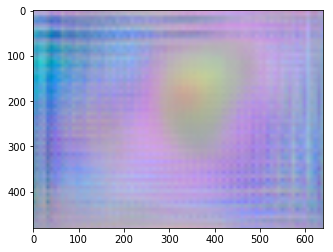

In [54]:
plt.imshow(temp2)

In [55]:
res_a_norm = dc_plotting.normalize_descriptor(res_a, dcn.descriptor_image_stats["mask_image"])
res_b_norm = dc_plotting.normalize_descriptor(res_b, dcn.descriptor_image_stats["mask_image"])

squashing with providd stats {'max': [0.7305974364280701, 0.9684668779373169, 1.0392730236053467], 'mean': [0.16775642335414886, 0.2063317894935608, -0.2564740777015686], 'min': [-0.39287760853767395, -0.6135923862457275, -0.821259617805481]}
squashing with providd stats {'max': [0.7305974364280701, 0.9684668779373169, 1.0392730236053467], 'mean': [0.16775642335414886, 0.2063317894935608, -0.2564740777015686], 'min': [-0.39287760853767395, -0.6135923862457275, -0.821259617805481]}


## Single output normalize when having image stats

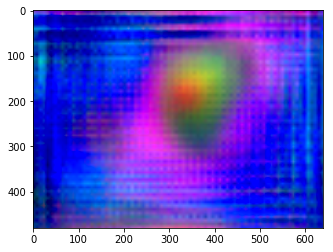

In [56]:
plt.imshow(res_a_norm)

## Pair Normalize when dont have image stats

In [72]:
res_a_norm__ = dc_plotting.normalize_descriptor(res_a)

In [77]:
res_a.min()

-3.6422806

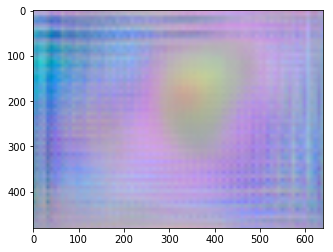

In [73]:
plt.imshow(res_a_norm__)

## Nromalization as if there was F.normalize()

In [58]:
import torch.nn.functional as F

In [59]:
res_a_output, _ = dcn.forward(rgb_a_tensor.unsqueeze(0).cuda())

In [60]:
res_a_output.shape

torch.Size([1, 3, 480, 640])

In [61]:
res_a_output.min()

tensor(-3.6423, device='cuda:0', grad_fn=<MinBackward1>)

In [62]:
res_a_f_nromalize = F.normalize(res_a_output)

In [63]:
res_a_f_nromalize.shape

torch.Size([1, 3, 480, 640])

In [64]:
res_a_f_nromalize_cpu_np = res_a_f_nromalize.squeeze(0).cpu().detach().permute(1,2,0).numpy()
# res_a_f_nromalize_cpu_np = res_a_f_nromalize_cpu_np.permute(1,2,0)

In [65]:
res_a_f_nromalize_cpu_np.shape

(480, 640, 3)

In [81]:
res_a_f_nromalize_cpu_np.max()

0.99999875

In [88]:
res_a_f_nromalize_cpu_np_norm__ = dc_plotting.normalize_descriptor(res_a_f_nromalize_cpu_np, {'min': -1.0, 'max': 1.0})


squashing with providd stats {'max': 1.0, 'min': -1.0}


In [66]:
res_a_f_nromalize_cpu_np_norm = (res_a_f_nromalize_cpu_np - res_a_f_nromalize_cpu_np.min()) / (res_a_f_nromalize_cpu_np.max() - res_a_f_nromalize_cpu_np.min())    


In [89]:
res_a_f_nromalize_cpu_np_norm__[:1, :10, :10]

array([[[0.7334751 , 0.2638204 , 0.8737761 ],
        [0.7170427 , 0.26034382, 0.8813888 ],
        [0.70189255, 0.25747418, 0.887841  ],
        [0.68793046, 0.25510165, 0.893328  ],
        [0.6750595 , 0.25313687, 0.8980111 ],
        [0.663185  , 0.25150734, 0.9020225 ],
        [0.6522171 , 0.25015408, 0.9054713 ],
        [0.64207256, 0.24902928, 0.9084472 ],
        [0.63267493, 0.24809393, 0.911024  ],
        [0.62981564, 0.25090232, 0.91364026]]], dtype=float32)

In [85]:
res_a_f_nromalize_cpu_np_norm[:1, :10, :10]

array([[[0.73346955, 0.263804  , 0.87377375],
        [0.7170367 , 0.2603273 , 0.88138664],
        [0.70188624, 0.2574576 , 0.88783896],
        [0.68792385, 0.25508502, 0.89332616],
        [0.6750526 , 0.25312018, 0.8980093 ],
        [0.6631778 , 0.25149062, 0.9020208 ],
        [0.65220964, 0.25013733, 0.9054697 ],
        [0.64206487, 0.2490125 , 0.90844566],
        [0.632667  , 0.24807714, 0.9110225 ],
        [0.62980765, 0.2508856 , 0.91363883]]], dtype=float32)

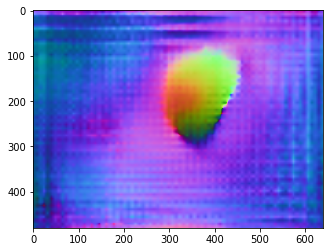

In [82]:
plt.imshow(res_a_f_nromalize_cpu_np_norm)

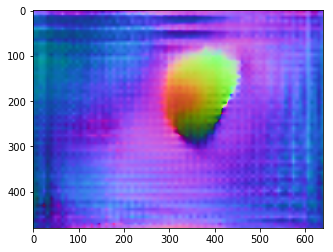

In [90]:
plt.imshow(res_a_f_nromalize_cpu_np_norm__)

In [68]:
D = np.shape(res_a)[2]
mask_a_repeat = np.repeat(mask_a[:, :, np.newaxis], D, axis=2)
mask_b_repeat = np.repeat(mask_b[:, :, np.newaxis], D, axis=2)

In [69]:
masked_normalized_descriptor1 = res_a_norm * mask_a_repeat
masked_normalized_descriptor2 = res_b_norm * mask_b_repeat

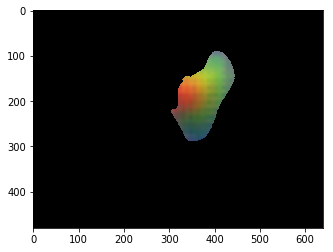

In [70]:
plt.imshow(masked_normalized_descriptor1)

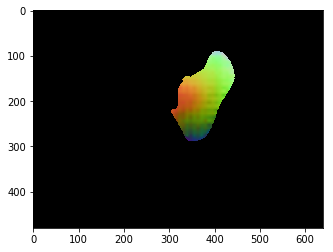

In [71]:
plt.imshow(res_a_f_nromalize_cpu_np_norm * mask_a_repeat)

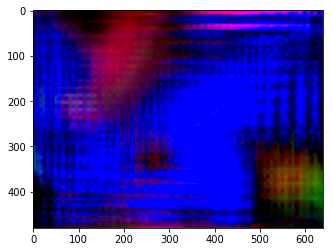

In [35]:
plt.imshow(res_a)

In [36]:
res_a = res_a.data.cpu().numpy()
res_b = res_b.data.cpu().numpy()

AttributeError: 'buffer' object has no attribute 'cpu'